In [8]:
# import os
# for dirname, _, filenames in os.walk('/kaggle/input/train'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow.keras 
import sklearn as sk
import skimage as sm
import cv2 as cv 
import matplotlib.pyplot as plt

<br>
<h1 style = "font-size:30px; font-weight : bold; color : black; text-align: center; border-radius: 10px 15px;">Breast X-Ray (Breast Cancer): Image Classification with Deep Learning</h1>
<br>

Breast cancer image classification using Deep Learning (DL) is a popular research area that aims to improve the accuracy of breast cancer diagnosis. Deep Learning techniques, such as Convolutional Neural Networks (CNNs), have been used to classify breast cancer histopathology images and have shown promising results in achieving the correct classification of breast cancer. There are various deep learning models that have been investigated for this purpose, and ongoing research continues to explore new techniques and improve upon existing ones.
Our approach is trying simple implementations.

## Loading the images 🖼️

In [6]:
import os

# Define the root directory of the images
root_directory = 'input/train'

# Define a dictionary to map directory names to labels
label_mapping = {
    "normal": "normal",
    "malignant": "malignant",
    "beneign": "beneign"
}

# Initialize the data list
data = []

# Traverse through the subdirectories within the root directory and collect image paths and labels
for label in label_mapping.keys():
    label_directory = os.path.join(root_directory, label)
    for dirname, _, filenames in os.walk(label_directory):
        for filename in filenames:
            image_path = os.path.join(dirname, filename)
            data.append((image_path, label))

# Print the generated data list
for image_path, label in data:
    print(image_path, label)


input/train\normal\BAHEYA_103262896885476\100009AF.png normal
input/train\normal\BAHEYA_103262896885476\100009B0.png normal
input/train\normal\BAHEYA_103262896885476\100009B1.png normal
input/train\normal\BAHEYA_103262896885476\100009B2.png normal
input/train\normal\BAHEYA_118275783317575\1000015B.png normal
input/train\normal\BAHEYA_118275783317575\1000015C.png normal
input/train\normal\BAHEYA_118275783317575\1000015D.png normal
input/train\normal\BAHEYA_118275783317575\1000015E.png normal
input/train\normal\BAHEYA_123336993234502\10000273.png normal
input/train\normal\BAHEYA_123336993234502\10000274.png normal
input/train\normal\BAHEYA_123336993234502\10000275.png normal
input/train\normal\BAHEYA_123336993234502\10000276.png normal
input/train\normal\BAHEYA_123969252253913\10000613.png normal
input/train\normal\BAHEYA_123969252253913\10000614.png normal
input/train\normal\BAHEYA_123969252253913\10000615.png normal
input/train\normal\BAHEYA_123969252253913\10000616.png normal
input/tr

In [7]:
len(data)

376

In [27]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# Define a dictionary to map labels to numerical values
label_mapping = {"normal": 0, "malignant": 1, "beneign": 2}

# Define lists to store the loaded images and corresponding labels
images = []
labels = []

# Load and preprocess the images with labels
for path, label in data:
    img = load_img(path, target_size=(224, 224))  
    img_array = img_to_array(img) / 255.0  # Convert image to numpy array and normalize values
    images.append(img_array)
    labels.append(label_mapping[label])

# Convert the lists of images and labels to numpy arrays
images_array = np.array(images)
labels_array = to_categorical(np.array(labels), num_classes=len(label_mapping))



# Print shape of the images and labels arrays
print("Shape of images array:", images_array.shape)
print("Shape of labels array:", labels_array.shape)

Shape of images array: (376, 224, 224, 3)
Shape of labels array: (376, 3)


In [11]:
# Indices of images for different categories
normal_indices = np.where(labels_array == label_mapping["normal"])[0][:2]
benign_indices = np.where(labels_array == label_mapping["beneign"])[0][:2]
malignant_indices = np.where(labels_array == label_mapping["malignant"])[0][:2]
print(normal_indices)
print(benign_indices)
print(malignant_indices)

[0 1]
[236 237]
[140 141]


## Data Exploration 🌟

### Let us see how the data looks 👀

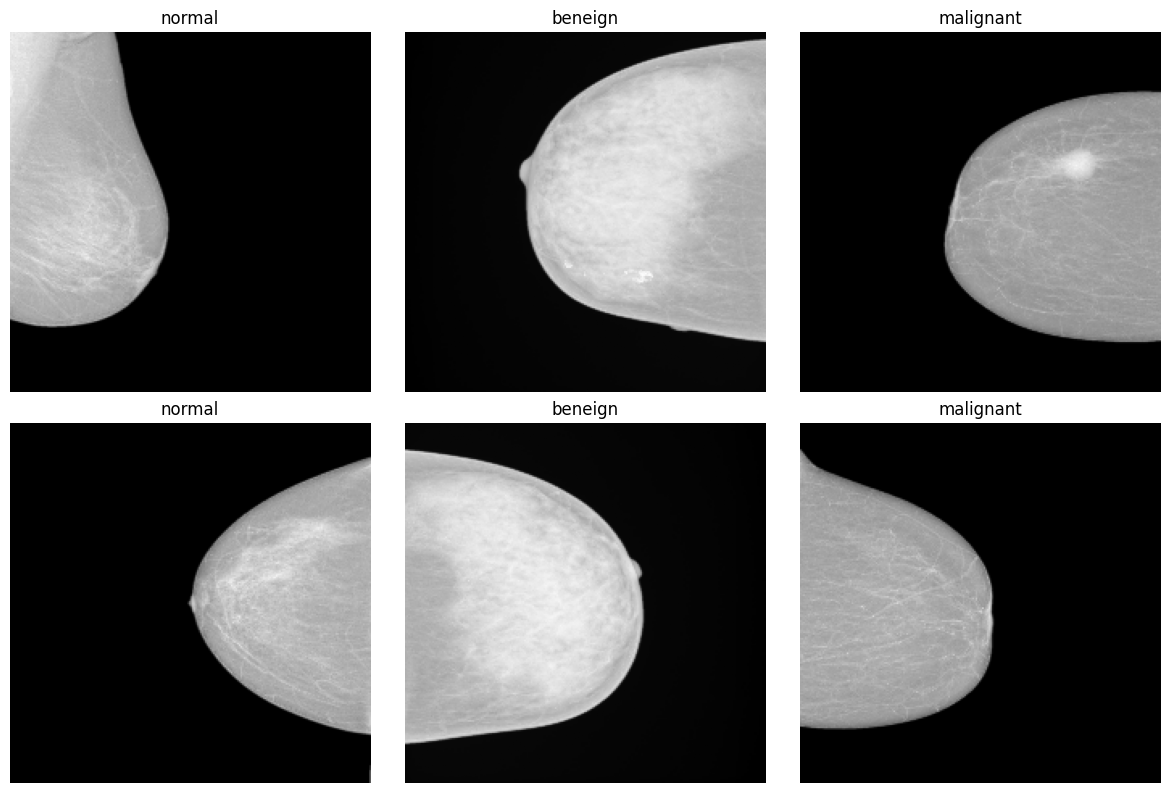

In [12]:
# Plotting the images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for i, indices in enumerate([normal_indices, benign_indices, malignant_indices]):
    for j, idx in enumerate(indices):
        ax = axes[j, i]
        ax.imshow(images_array[idx])
        ax.set_title(list(label_mapping.keys())[list(label_mapping.values()).index(labels_array[idx])])
        ax.axis('off')
plt.tight_layout()
plt.show()

### what about the distribution of the classes 🤔

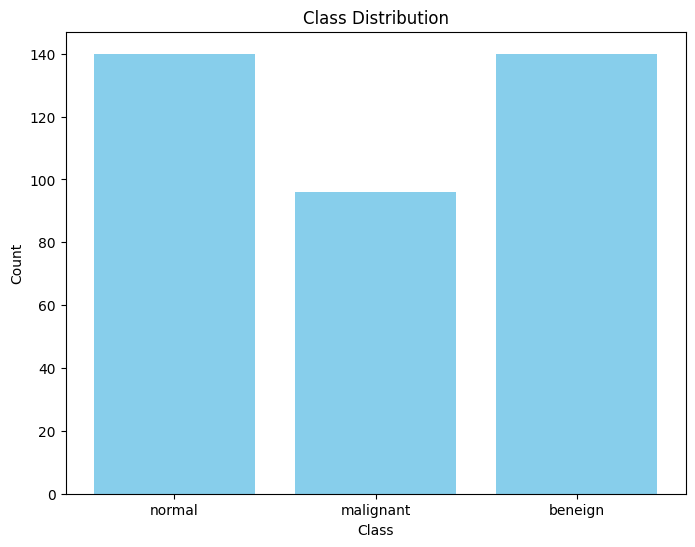

In [13]:
# Plot histograms of class distribution
plt.figure(figsize=(8, 6))
plt.hist(labels_array, bins=np.arange(len(label_mapping) + 1) - 0.5, align='mid', rwidth=0.8, color='skyblue')
plt.xticks(list(label_mapping.values()), list(label_mapping.keys()))
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

### Is there any possible relations in the image intensities 🙈
Seems that normal breasts have more uniform intensities that are not concentrated on one part of the graph!

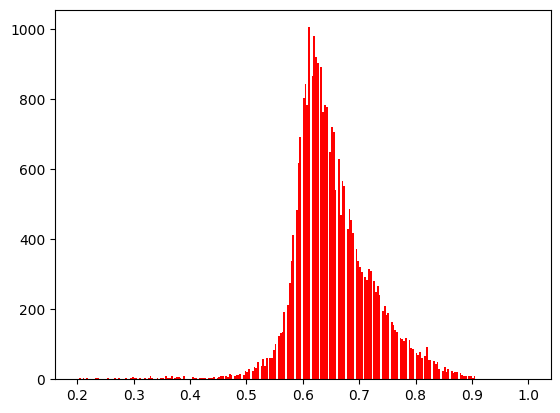

In [14]:
plt.hist(images_array[6,:,:, 0].ravel(), bins=256, range=(0.2, 1), color='red');

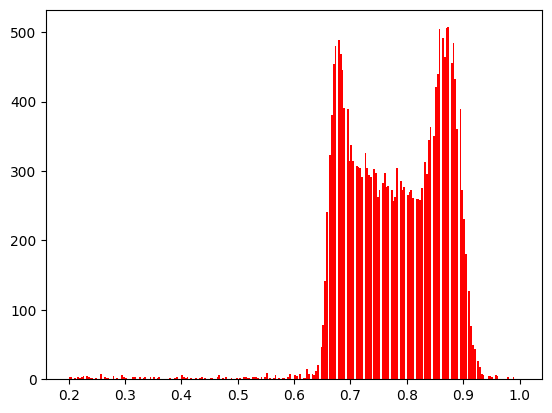

In [15]:
plt.hist(images_array[236,:,:, 0].ravel(), bins=256, range=(0.2, 1), color='red');

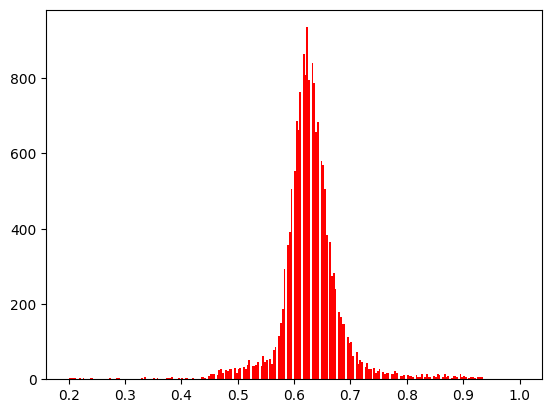

In [16]:
plt.hist(images_array[140,:,:, 0].ravel(), bins=256, range=(0.2, 1), color='red');

## Data preparation and preprocessing 🔨

In [28]:
num_images = images_array.shape[0]
num_pixels = images_array.shape[1] * images_array.shape[2] * images_array.shape[3]
flattened_images = images_array.reshape(num_images, num_pixels)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(flattened_images,labels_array, test_size=0.2, random_state=42,shuffle=True,stratify=labels_array)


In [30]:
y_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0

## Model Creation 🎭

In [58]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation,BatchNormalization


early_stopping = callbacks.EarlyStopping(
    min_delta=0.01, # minimium amount of change to count as an improvement
    patience=5, # how many epochs to wait before stopping
    restore_best_weights=True)

model = keras.Sequential([
    BatchNormalization(input_shape=(X_train.shape[1],)),
    Dropout(0.7),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.6),
    Dense(3, activation='softmax'),
])


model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='SGD')
# training the model and saving metrics in history
history = model.fit(X_train, y_train,
          batch_size=16, epochs=100,
          verbose=2,
          validation_data=(X_test, y_test),
                   callbacks=[early_stopping])


Epoch 1/100
19/19 - 16s - loss: 2.3295 - accuracy: 0.3433 - val_loss: 1.6913 - val_accuracy: 0.3553 - 16s/epoch - 851ms/step
Epoch 2/100
19/19 - 13s - loss: 1.9545 - accuracy: 0.3900 - val_loss: 1.3566 - val_accuracy: 0.3026 - 13s/epoch - 681ms/step
Epoch 3/100
19/19 - 13s - loss: 2.1944 - accuracy: 0.3167 - val_loss: 1.3680 - val_accuracy: 0.3158 - 13s/epoch - 676ms/step
Epoch 4/100
19/19 - 14s - loss: 1.9823 - accuracy: 0.3733 - val_loss: 1.2430 - val_accuracy: 0.3158 - 14s/epoch - 727ms/step
Epoch 5/100
19/19 - 12s - loss: 1.8601 - accuracy: 0.3800 - val_loss: 1.1492 - val_accuracy: 0.3947 - 12s/epoch - 641ms/step
Epoch 6/100
19/19 - 13s - loss: 1.8869 - accuracy: 0.3933 - val_loss: 1.1688 - val_accuracy: 0.3816 - 13s/epoch - 708ms/step
Epoch 7/100
19/19 - 13s - loss: 1.6275 - accuracy: 0.4100 - val_loss: 1.2801 - val_accuracy: 0.3816 - 13s/epoch - 660ms/step
Epoch 8/100
19/19 - 12s - loss: 1.7062 - accuracy: 0.3800 - val_loss: 1.2862 - val_accuracy: 0.3158 - 12s/epoch - 616ms/step


## Results 😶‍🌫️

Best Validation Loss: 1.1482
Best Validation Accuracy: 0.5921


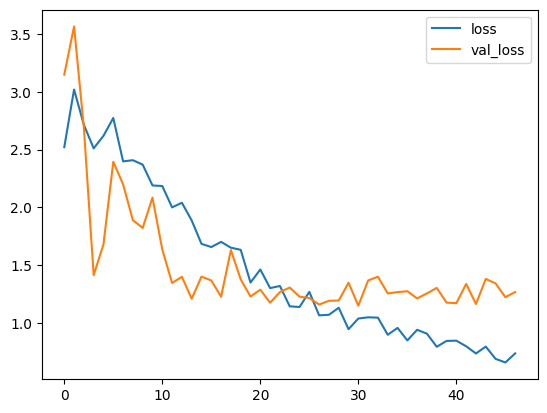

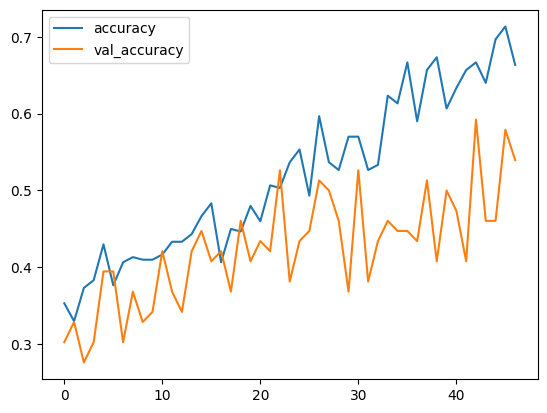

In [57]:
history_df = pd.DataFrame(history.history)

history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

## Save Model 📝

In [ ]:
# # saving the model
# save_dir = "/kaggle/working/"
# model_name = 'bioverse.h5'
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)

In [ ]:
cancer_model = load_model('/kaggle/working/bioverse.h5')

loss_and_metrics = cancer_model.evaluate(X_test, y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

In [ ]:
from sklearn.metrics import f1_score
y_pred = cancer_model.predict(X_test)

micro_f1 = f1_score(np.argmax(y_test,axis=1), np.argmax(y_pred,axis=1), average='macro')

print("Micro F1 Score:", micro_f1)

In [ ]:
import os

# Define the root directory of the images
root_directory = '/kaggle/input/bioverse-hackathon-a/test'



# Initialize the data list
data = []
    
for dirname, _, filenames in os.walk('/kaggle/input/bioverse-hackathon-a/test'):
    for filename in filenames:
            image_path = os.path.join(dirname, filename)
            data.append((image_path, label))

# Print the generated data list
for image_path, label in data:
    print(image_path, label)


In [ ]:
test = []

# Load and preprocess the images with labels
for path, label in data:
    img = load_img(path, target_size=(224, 224))  
    img_array = img_to_array(img) / 255.0  # Convert image to numpy array and normalize values
    test.append(img_array)

test=np.array(test)

In [ ]:
num_images = test.shape[0]
num_pixels = test.shape[1] * test.shape[2] * test.shape[3]
flattened_test = test.reshape(num_images, num_pixels)
flattened_test.shape

In [ ]:
print(filenames)

In [ ]:
y_pred = cancer_model.predict(flattened_test)
preds=np.argmax(y_pred,axis=1)

label_mapping = {"normal": 0, "malignant": 1, "beneign": 2}


In [ ]:
import pandas as pd

submn = pd.DataFrame({'filename' : filenames,'class': preds},)
submn

In [ ]:

label_mapping = {0: "normal", 1: "malignant", 2: "beneign"}

# Replace the numerical labels with string labels
submn['class'] = submn['class'].replace(label_mapping)

submn

In [ ]:
submn.to_csv('submission.csv', index=False)

### Inference 

In [ ]:
num_images = 1
num_pixels = test[0,:,:,:].shape[0] * test[0,:,:,:].shape[1] * test[0,:,:,:].shape[2]
flattened_test = test[0,:,:,:].reshape(num_images, num_pixels)
flattened_test.shape

In [ ]:
import time

start = time.time() ## record start time
y_pred = cancer_model.predict(flattened_test)
preds=np.argmax(y_pred,axis=1)
end = time.time() ## records end time
print(end - start)
